In [5]:
#Using data from 2023 ATP Tennis Matches to predict ATP winners

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read dataset
df = pd.read_csv('atp_matches_2023.csv')



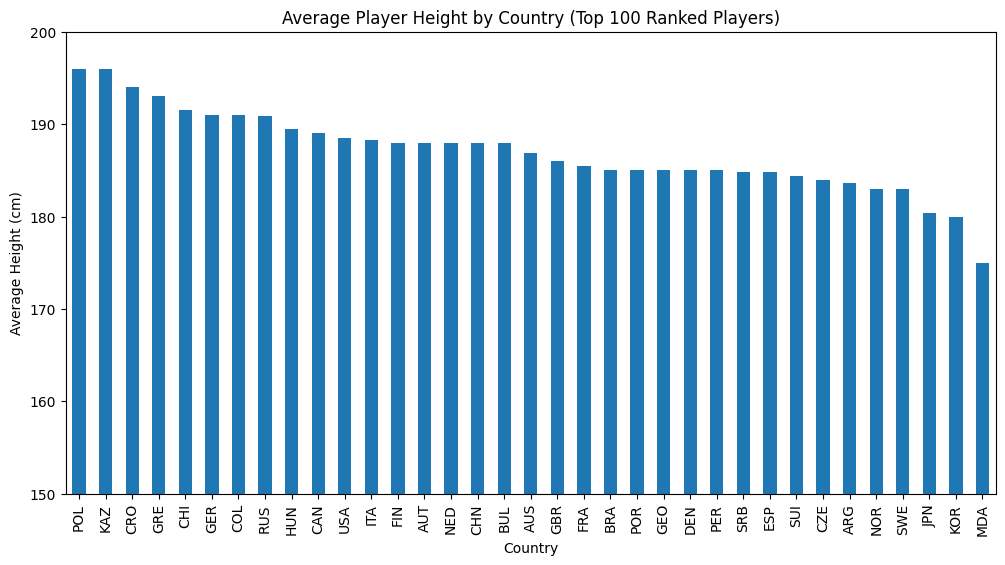

In [48]:
#What country provides the tallest (athletic) players?

#Get most recent match data for winners and losers
winner_latest = df.sort_values('tourney_date').groupby('winner_id').last()[['winner_rank', 'winner_ioc', 'winner_ht']]
loser_latest = df.sort_values('tourney_date').groupby('loser_id').last()[['loser_rank', 'loser_ioc', 'loser_ht']]

#Rename columns
winner_latest = winner_latest.rename(columns={
    'winner_rank': 'rank',
    'winner_ioc': 'ioc',
    'winner_ht': 'ht'
})
loser_latest = loser_latest.rename(columns={
    'loser_rank': 'rank',
    'loser_ioc': 'ioc',
    'loser_ht': 'ht'
})

#Combine both dataframes
players_combined = pd.concat([winner_latest, loser_latest], ignore_index=True)

#Filter for top 100 players and drop rows with missing values
top_100_all = players_combined[players_combined['rank'] <= 100].dropna(subset=['ht', 'ioc'])

#Calculate average height by country
avg_ht_top_100_all = top_100_all.groupby('ioc')['ht'].mean().sort_values(ascending=False)

#Plot the barplot
plt.figure(figsize=(12, 6))
avg_ht_top_100_all.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Height (cm)')
plt.title('Average Player Height by Country (Top 100 Ranked Players)')
plt.ylim(150, 200)
plt.show()

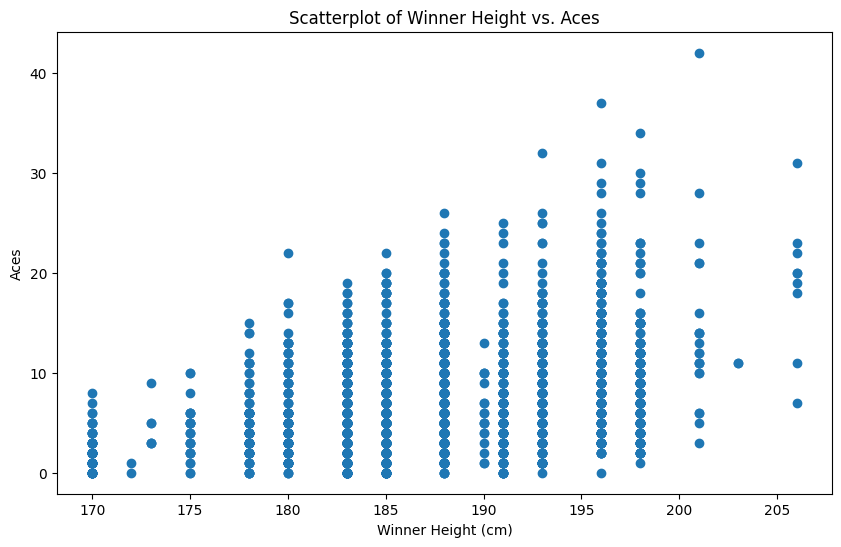

In [42]:
#What height is the best for players to serve well?

#Select height and aces and remove missing values
scatter_ht_aces = df[['winner_ht', 'w_ace']].dropna()

#Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_ht_aces['winner_ht'], scatter_ht_aces['w_ace'])
plt.xlabel('Winner Height (cm)')
plt.ylabel('Aces')
plt.title('Scatterplot of Winner Height vs. Aces')
plt.show()

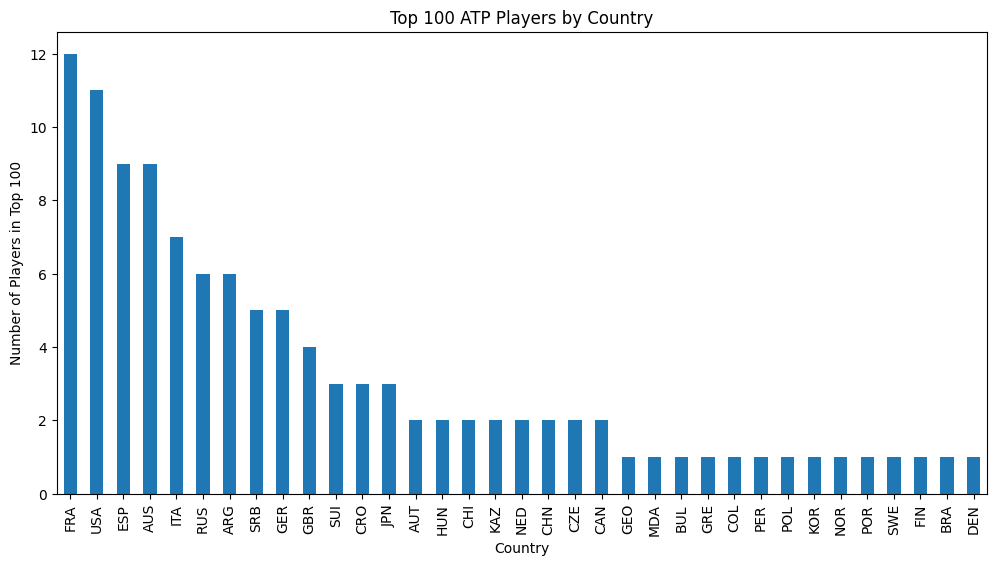

In [18]:
#Which country produces the best players?

#Get the most recent entry per winner (last match has latest rank)
latest_ranks = df.sort_values('tourney_date').groupby('winner_id').last()[['winner_rank', 'winner_ioc']]

#Filter to only players ranked in the top 100
top_100 = latest_ranks[latest_ranks['winner_rank'] <= 100]

#Count how many top 100 players each country has
top_100_counts = top_100['winner_ioc'].value_counts().sort_values(ascending=False)

#Plotting the result
plt.figure(figsize=(12, 6))
top_100_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Players in Top 100')
plt.title('Top 100 ATP Players by Country')
plt.show()

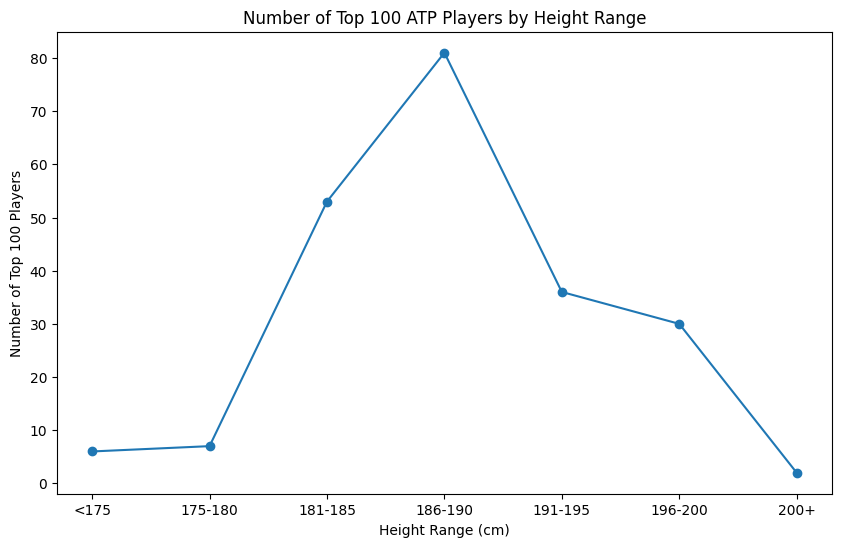

In [46]:
#What are the heights of the top players?

#Define height bins and labels
bins = [0, 175, 180, 185, 190, 195, 200, 210]
labels = ['<175', '175-180', '181-185', '186-190', '191-195', '196-200', '200+']

#Bin the heights
top_100_all['ht_group'] = pd.cut(top_100_all['ht'], bins=bins, labels=labels, right=False)

#Count number of players in each height range
ht_group_counts = top_100_all['ht_group'].value_counts().sort_index()

#Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(ht_group_counts.index, ht_group_counts.values, marker='o', linestyle='-')
plt.xlabel('Height Range (cm)')
plt.ylabel('Number of Top 100 Players')
plt.title('Number of Top 100 ATP Players by Height Range')
plt.show()

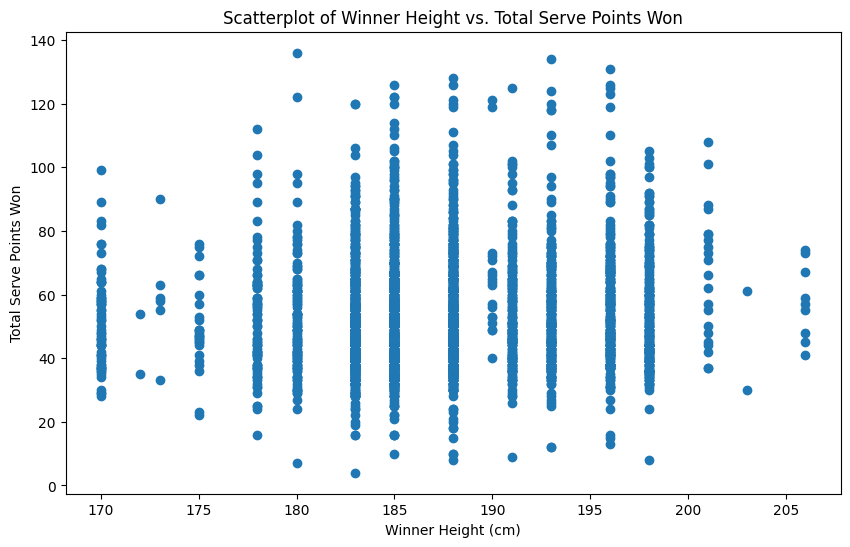

In [23]:
#What height is best for winning service points?

#Total serve points won (1st + 2nd)
df['total_serve_points_won'] = df['w_1stWon'] + df['w_2ndWon']

#Filter for rows with non-null height and serve points won
scatter_df_combined = df[['winner_ht', 'total_serve_points_won']].dropna()

#Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df_combined['winner_ht'], scatter_df_combined['total_serve_points_won'])
plt.xlabel('Winner Height (cm)')
plt.ylabel('1st + 2nd Serve Points Won')
plt.title('Scatterplot of Winner Height vs. Total Serve Points Won')
plt.show()
